<a href="https://colab.research.google.com/github/wanghaitao666/NovelListAI/blob/main/Default_Prediction_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for PD Estimation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from google.colab import files

In [ ]:
uploaded = files.upload()

data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
X = data.drop(columns=['ID', 'default.payment.next.month'])
y = data['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C': [0.001, 0.09, 1, 5, 10],
             'kernel': ('linear', 'rbf')}

In [ ]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc,
                                  scoring='roc_auc', n_jobs=-1)
halve_SVC.fit(X_train_scaled, y_train)
print('Best hyperparameters in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=1200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.78375    0.55386364 0.74113636 0.77125
 0.78375    0.64795455 0.57443182]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection

Best hyperparameters in SVC 0.7304177509201206 with {'kernel': 'rbf', 'gamma': 1e-06, 'C': 0.09}


In [ ]:
y_pred_SVC = halve_SVC.predict(X_test_scaled)

print('The ROC AUC score of the best-tuned SVC is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_SVC)))

The ROC AUC score of the best-tuned SVC is 0.5000


In [ ]:
# Polynomial Kernel SVM
poly_svm = SVC(kernel="poly", degree=3, coef0=1, C=5, class_weight='balanced')

poly_svm.fit(X_train_scaled, y_train)

y_pred_svm_poly = poly_svm.predict(X_test_scaled)

print('The ROC AUC score of the Polynomial SVM is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_svm_poly)))

The ROC AUC score of the Polynomial SVM is 0.6963


In [ ]:
# Gaussian RBF Kernel SVM
rbf_svm = SVC(kernel="rbf", degree=3, coef0=1, C=5, class_weight='balanced')

rbf_svm.fit(X_train_scaled, y_train)

y_pred_svm_rbf = rbf_svm.predict(X_test_scaled)

print('The ROC AUC score of the RBF SVM is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_svm_rbf)))

The ROC AUC score of the RBF SVM is 0.7021


# Decision Tree for PD Estimation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from pathlib import Path

tree_clf = DecisionTreeClassifier(max_depth=2)  # Using max_depth=2 as in the professor's code
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

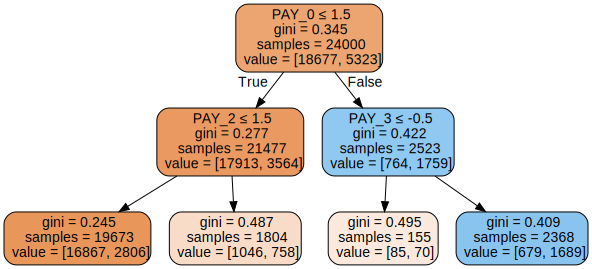

In [ ]:
from sklearn.tree import export_graphviz
results_path = Path('results', 'decision_trees')
if not results_path.exists():
    results_path.mkdir(parents=True)

out_file = results_path / 'credit_tree_1.dot'
export_graphviz(
    tree_clf,
    out_file=out_file.as_posix(),
    feature_names=X_train.columns,
    rounded=True,
    filled=True,
    special_characters=True
)

dot_data = out_file.read_text()
graphviz.Source(dot_data)

In [ ]:
y_pred_dt = tree_clf.predict(X_test)
print('The ROC AUC score of Decision Tree for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_dt)))

The ROC AUC score of Decision Tree for first cluster is 0.6345


# Random Forest for PD Estimation

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [ ]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train, y_train)
print('Best hyperparameters in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 96 is smaller than n_iter=1200. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466

Best hyperparameters in RF 0.7523970372413114 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}


In [ ]:
y_pred_RF = halve_RF.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_RF)))

The ROC AUC score of RF for first cluster is 0.6429


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_rf_bagging = bag_clf.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_rf_bagging)))

The ROC AUC score of RF for first cluster is 0.6454


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf_bagging))

0.8186666666666667


### *Boosting*

- AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
print('The ROC AUC score of AdaBoost is {:.4f}'.format(roc_auc_score(y_test, y_pred_ada)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The ROC AUC score of AdaBoost is 0.6401


- Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
y_pred_gbrt = gbrt.predict(X_test)
print('The ROC AUC score of Gradient Boosting is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_gbrt)))

The ROC AUC score of Gradient Boosting is 0.7648
